Trabalho Prático 1 - Disciplina de Computação Gráfica – 2024

Dupla:
*   Deise Santana dos Santos
*   Friedrich Naum Espíndola

In [ ]:
''' Bibliotecas '''
from lxml import etree
import matplotlib.pyplot as plt

In [ ]:
# Leitura do arquivo XML
tree = etree.parse("entrada.xml")

In [ ]:
# Classes
class Window:
    def __init__(self, xwmin, ywmin, xwmax, ywmax):
        self.xwmin = xwmin
        self.ywmin = ywmin
        self.xwmax = xwmax
        self.ywmax = ywmax

class Dot:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Line:
    def __init__(self, dot1, dot2):
        self.dot1 = dot1
        self.dot2 = dot2

class Polygon:
    def __init__(self, dots):
        self.dots = dots

In [ ]:
# Busca dos Elementos -> Window
window_xml = tree.find("./window")

xwmin = window_xml.find("wmin").get("x")
ywmin = window_xml.find("wmin").get("y")
xwmax = window_xml.find("wmax").get("x")
ywmax = window_xml.find("wmax").get("y")

window = Window(float(xwmin), float(ywmin), float(xwmax), float(ywmax))

In [ ]:
# Busca dos Elementos -> Dots
dots_xml = tree.findall("./ponto")

dots = []

for dot_xml in dots_xml:
  x = dot_xml.attrib['x']
  y = dot_xml.attrib['y']
  dot = Dot(x, y)
  dots.append(dot)

In [ ]:
# Busca dos Elementos -> Lines
lines_xml = tree.findall("./reta")

lines = []

for line_xml in lines_xml:
  x1 = line_xml[0].attrib['x']
  y1 = line_xml[0].attrib['y']

  dot1 = Dot(x1, y1)

  x2 = line_xml[1].attrib['x']
  y2 = line_xml[1].attrib['y']

  dot2 = Dot(x2, y2)

  line = Line(dot1, dot2)

  lines.append(line)

In [ ]:
# Busca dos Elementos -> Polygons
polygons_xml = tree.findall("./poligono")

polygons = []

for polygon_xml in polygons_xml:
  dots = []

  for dot_xml in polygon_xml.findall("./ponto"):
      x = dot_xml.attrib['x']
      y = dot_xml.attrib['y']
      dot = Dot(x, y)
      dots.append(dot)

  polygons.append(dots)

In [ ]:
# Plotagem
xwmax = float(window.xwmax)
ywmax = float(window.ywmax)

plt.figure(figsize=(xwmax, ywmax))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

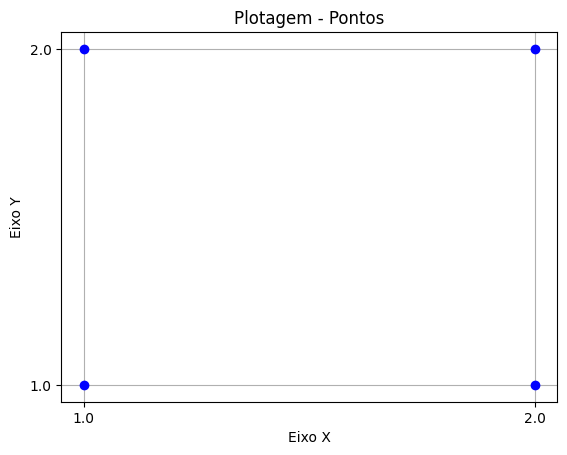

In [ ]:
# Plotagem - Dots
for dot in dots:
    plt.plot(dot.x, dot.y, 'bo')

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Plotagem - Pontos')
plt.grid(True)
plt.show()

In [ ]:
# Plotagem - Lines
for line in lines:
    plt.plot([float(line.dot1.x, line.dot2.x], [line.dot1.y, line.dot2.y], 'r-')

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Plotagem - Linhas')
plt.grid(True)
plt.show()

TypeError: float() argument must be a string or a real number, not 'list'

In [ ]:
# Plotagem - Polygons
for polygon in polygons:
    x_values = [dot.x for dot in polygon]
    y_values = [dot.y for dot in polygon]
    plt.fill(x_values, y_values, alpha=0.3)

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Plotagem - Polígonos')
plt.grid(True)
plt.show()

In [ ]:
# Plotagem - Todos
fig = plt.figure()
ax = fig.add_subplot(111)

for dot in dots:
    ax.plot(dot.x, dot.y, 'bo')

for line in lines:
    ax.plot([line.dot1.x, line.dot2.x], [line.dot1.y, line.dot2.y], 'r-')

for polygon in polygons:
    x_values = [dot.x for dot in polygon]
    y_values = [dot.y for dot in polygon]
    ax.fill(x_values, y_values, alpha=0.3)

ax.set_xlim(0, window.xwmax)
ax.set_ylim(0, window.ywmax)

ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_title('Plotagem - Todos')
ax.grid(True)
plt.show()